In [125]:
import numpy as np
import pandas as pd
import pylab as pl
import os
import scipy

import json
s = json.load( open("../fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [102]:
months = ['201501', '201506', '201510']

months_df = []

for month in months:
    data = pd.read_csv(os.getenv("PUIDATA") + "/" + month + '-citibike-tripdata.csv')
    months_df.append(data)
    
data = pd.concat(months_df, ignore_index=True)
data.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
2439043,1924,10/31/2015 23:59:46,11/1/2015 00:31:50,498,Broadway & W 32 St,40.748549,-73.988084,531,Forsyth St & Broome St,40.718939,-73.992663,17292,Subscriber,1960.0,1
2439044,711,10/31/2015 23:59:50,11/1/2015 00:11:42,348,W Broadway & Spring St,40.724910,-74.001547,361,Allen St & Hester St,40.716059,-73.991908,23374,Subscriber,1982.0,1
2439045,621,10/31/2015 23:59:54,11/1/2015 00:10:15,237,E 11 St & 2 Ave,40.730473,-73.986724,348,W Broadway & Spring St,40.724910,-74.001547,23503,Subscriber,1990.0,1
2439046,632,10/31/2015 23:59:56,11/1/2015 00:10:29,237,E 11 St & 2 Ave,40.730473,-73.986724,348,W Broadway & Spring St,40.724910,-74.001547,22104,Subscriber,1980.0,2
2439047,807,10/31/2015 23:59:57,11/1/2015 00:13:24,468,Broadway & W 55 St,40.765265,-73.981923,446,W 24 St & 7 Ave,40.744876,-73.995299,14597,Subscriber,1967.0,1


In [103]:
data['age'] = 2016 - data['birth year']
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,age
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,56.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,53.0
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,42.0
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,47.0
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,39.0


In [106]:
print len(data)

2439048


In [107]:
data.age.isnull().values.sum()

282532

In [151]:
data.age.dropna(inplace=True)
mean = data.age.mean()
sd = data.age.std()
mean, sd


(39.547544743465849, 11.560936154863539)

In [167]:
age_dist = data.age.value_counts()
age_dist_norm = age_dist / len(data.age)
print(age_dist_norm.head())

print(age_dist[31])
age_dist[32]

# age_counts = pd.

31.0    0.040949
32.0    0.040944
33.0    0.040631
30.0    0.038331
29.0    0.037339
Name: age, dtype: float64
88308


88296

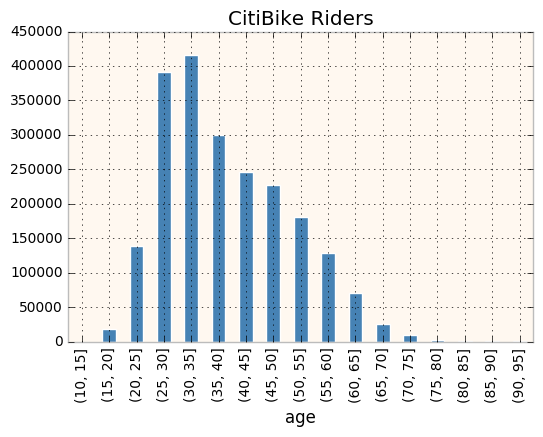

In [172]:
bins = np.arange(10, 99, 5)

ax = data.age.groupby(pd.cut(data.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
ax.set_title("CitiBike Riders")


### H0: The distribution of the sample of CitiBike rider ages and the model distribution (whichever model is being tested) are identical; or, the sample comes from the model distribution; at a significance level of alpha = 0.05.

In [173]:
scipy.stats.kstest(data.age, 'norm', args=(39.55, ))

KstestResult(statistic=0.50167848978246388, pvalue=0.0)

In [156]:
scipy.stats.kstest(data.age, 'logistic', args=(39.55, 11.56))

KstestResult(statistic=0.175564710271505, pvalue=0.0)

In [175]:
critval = 1.36/math.sqrt(len(data.age))
critval

0.0009261099836895882

### The test statistic in both cases is larger than the critical value,  Both p-values are zero, meaning we can reject the null hypothesis that the sample distribution is identical to a normal distibution, in the first case, or a logistic distribution, in the second.

In [158]:
scipy.stats.anderson(data.age)

AndersonResult(statistic=27813.156906862743, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [157]:
scipy.stats.anderson(data.age, dist='logistic')

AndersonResult(statistic=26970.623827407602, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))

### The critical value corresponding to alpha = 0.05 is 0.66. Our statistic, in both cases, is nowhere close to being less than the critical value. Therefore we reject the null.